<a href="https://colab.research.google.com/github/Hamtori82/low_fertility_policy/blob/master/%EB%84%A4%EC%9D%B4%EB%B2%84%EB%89%B4%EC%8A%A4%EB%8C%93%EA%B8%80%ED%81%AC%EB%A1%A4%EB%A7%81_2020%EB%85%84%EA%B2%BD%EC%A0%9C%EC%A0%95%EC%B1%85%EB%B0%A9%ED%96%A5_%EC%A0%80%EC%B6%9C%EC%82%B0%EA%B7%B9%EB%B3%B5%EC%A0%95%EC%B1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Colab에 Mecab 설치
# 코랩에서 한글 표기를 위해 폰트 설치

In [ ]:
flag = True
while flag :
  !git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
  %cd Mecab-ko-for-Google-Colab
  !bash install_mecab-ko_on_colab190912.sh

  !apt-get update -qq
  !apt-get install fonts-nanum* -qq  
  flag = False

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 115 (delta 11), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (115/115), 1.27 MiB | 2.57 MiB/s, done.
Resolving deltas: 100% (50/50), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.6 MB/s 
     |████████████████████████████████| 453 kB 60.3 MB/s 
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2022-10-17 08:07:53--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22cd:e0db, 2406:da00:ff00::22e9:9f55, ...
Connecting to bitbucket.org (bi

# 키워드 입력 후 크롤링

In [ ]:
from bs4 import BeautifulSoup
import requests
import re
import sys
import pprint
import csv
import json
import pandas as pd

result=[]

headers = {
    'authority': 'apis.naver.com',
    'accept': '*/*',
    'accept-language': 'ko-KR,ko;q=0.9,en-US;q=0.8,en;q=0.7',
    # Requests sorts cookies= alphabetically
    # 'cookie': 'ab.storage.userId.7af503ae-0c84-478f-98b0-ecfff5d67750=%7B%22g%22%3A%22browser-1625985144309-6%22%2C%22c%22%3A1626101500089%2C%22l%22%3A1626101500089%7D; ab.storage.deviceId.7af503ae-0c84-478f-98b0-ecfff5d67750=%7B%22g%22%3A%224cbe130c-6edd-d4aa-a78d-290b003c3592%22%2C%22c%22%3A1626101500094%2C%22l%22%3A1626101500094%7D; ASID=7992e0220000017aaa36664e0000004e; _ga=GA1.2.612969395.1626832328; ab.storage.sessionId.7af503ae-0c84-478f-98b0-ecfff5d67750=%7B%22g%22%3A%2228148006-e01d-7623-b7d1-b4fff0f59b4e%22%2C%22e%22%3A1627919390179%2C%22c%22%3A1627908091281%2C%22l%22%3A1627917590179%7D; MM_NEW=1; NFS=2; NNB=RDIIILNX6JCWE; nx_ssl=2; nid_inf=1665554565; NID_AUT=tP3V5ox533EjyAgkJ1JaqWEnPOhXs2hr3teD39pK972fuXqDWQZXoIOMzICJpa1A; NID_JKL=d393brIzilbjw+7TVvG0OW6Eo22+WIhQAfihItUdgbY=; _naver_usersession_=SPdJTrlTMrn8Udkyn58eo6HL; NID_SES=AAABwJaKJ5FjUAETXL8SAX2HKMUSTt3l8pPu49OSzbGzgKEEMN/ckpP4DbQVHQwTV1hVPWtbpP7Nomg0CbD8TtCpyOYbeq8+OpHb5eWbDsXXCeLHO4epgthLtbQHiBE8spXqEtx/h0D6MzxsIlN4pa8gz51jV+oWzQQNnpQCeaKKLaxcpMfhGXnZv4BK1Rg+TAgUFE9RtExcKjteTL2hB9tKT41C7antdQdhLfVXWUbsJ/q5b62iDZnnZUAANXHnWp/9RI2YyKSn70SVu4Bag+fxA/23OqjCHSbK5RMiNOQKV+Bs7uugaAsMKkH6lGBBIbNDkTXGZ4n1+KbqFwe1kV9oCaPJ+siwXESEqvY0jaLVNAqUATQZjnIMFIYwARw41FTuduxW1IOF7MdP7R3EqOvnqNir2lXW1UfRlHlOtMC4w/tXk8xqJR/HVlZrnltKkMZB5zfyDNvnt02jbOKJcORjmOeVvL+xoCdSXwZclfJzRkC31l43+9jSu4X8RPUfuJILRMHf2e1A0NU7Mwds7h+S//5AD0yUJlPtFFzLvriuD1SMTRXiSwN4pNWBi6UIsPzScRpyLMc8hUE8Bi8jJtGk4e0=; NDARK=N; page_uid=hrKUflprvN8ssNc4Muwssssss3R-382317; BMR=',
    'referer': 'https://n.news.naver.com/article/028/0002595736',
    'sec-ch-ua': '"Whale";v="3", " Not;A Brand";v="99", "Chromium";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-fetch-dest': 'script',
    'sec-fetch-mode': 'no-cors',
    'sec-fetch-site': 'same-site',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.5005.108 Whale/3.15.136.18 Safari/537.36',
}

def news_url(query):
    page =1 
    url_list=[]
    while page <= 151 :

        ## 2022년 기사만 (2022.01.01 ~ 10.17)
        url = "https://m.search.naver.com/search.naver?where=m_news&sm=mtb_pge&query="+query+"&sort=0&photo=0&field=0&pd=3&ds=2022.01.01&de=2022.10.17&cluster_rank=24&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from20220101to20221017&start="+str(page)   

        #url = "https://m.search.naver.com/search.naver?where=m_news&sm=tab_pge&query="+query+"&sort=0&photo=0&field=0&pd=1&ds=&de=&cluster_rank=129&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:1w,a:all&start="+str(page)
        response = requests.get(url,headers=headers)
        html = response.text

        #뷰티풀소프의 인자값 지정
        soup = BeautifulSoup(html, "lxml")
        # print(soup.select('a.news_tit')[3]['href'])
        #<a>태그에서 제목과 링크주소 추출
        atags = soup.select('.news_tit')
        #print(len(atags))
        for i in atags:
            if "https://n.news.naver.com/" in i['href'] :
                url_list.append(i['href'])   #링크주소
                #print(i['href'])
        if len(atags) < 15 : #한페이지에 15개나오는데, 그보다 작으면 없다고 판단
            break
        page = page + 15
    return url_list
    # 위에서 크롤링한 네이버 뉴스 url을 입력합니다.

def comment(url_list):
    total_comment = [] #모든 댓글을 담는 리스트
    for url_ex in url_list:
        url = url_ex
        url = url.split('?')[0]
        oid_1 = url.split('/')[-1]
        oid_2 = url.split('/')[-2]
        i = 1
        # df = pd.DataFrame(columns=['댓글'])

        while True:
            params = {
                'ticket': 'news',
                'templateId': 'default_society',
                'pool': 'cbox5',
                'lang': 'ko',
                'country': 'KR',
                'objectId': f'news{oid_2},{oid_1}',
                'pageSize': '100',
                'indexSize': '10',
                'page': str(i),
                'currentPage': '0',
                'moreParam.direction': 'next',
                'moreParam.prev': '10000o90000op06guicil48ars',
                'moreParam.next': '1000050000305guog893h1re',
                'followSize': '100',
                'includeAllStatus': 'true',
            }

            response = requests.get('https://apis.naver.com/commentBox/cbox/web_naver_list_jsonp.json', params=params, headers=headers)
            response.encoding = "UTF-8-sig"
            res = response.text.replace("_callback(","")[:-2]
            temp=json.loads(res) 
            # print(temp)
            try : 
                comment = list(pd.DataFrame(temp['result']['commentList'])['contents'])
                for j in range(len(comment)):
                    total_comment.append(comment[j])
                if len(comment)<97: 
                    break 
                else: 
                    i+=1
            except :
                break    

    print(total_comment)
    return total_comment



In [ ]:
# # 실행함수
def main():
    query = input("검색어 입력 : ")  
    # query= [영아수당 지급, 첫만남 꾸러미 도입, 부부육아 휴직 활성화, 공보육 확충, 다자녀 지원 확대]
    url_list = news_url(query)  
    allCommetns = comment(url_list)

query = input("검색어 입력 : ")  
url_list = news_url(query)  
allCommetns = comment(url_list)

검색어 입력 : 공보육 확충
['천안시 화이팅입니다!', '비판만 있고 대안은 없는 뜬구름 잡는 기사', '지금 정치적인 비판을 할 여유가 있는 줄 아시오? 지난 5년간 인구감소때문에 쓴 돈이 얼만데 지금 나아진 게 하나라도 있소?.  그러니 굳이 역주행 이랄 것도 없단 말이오.  인구 감소는 생존의 문제인데 아직도 비판만 하고 있다는게 한심하오.   전문가들도 해법을 못찾고 있고 논설의원 당신 머리에도 대안이 없는 것 다 아니까 함부로 입놀리지 마시오.', '여가부에서 쓸모없는 곳에 돈 쓰는것처럼 국가에 마이너스되는 일은없다\n\n국가 세금으로 운영되는 남혐기관이 있다는건 비정상적이다 \n\n걍 폐지가 답이며 그게 시대정신이다 민주주의 사회에서 왜 성특권을 내려놓지 못하나?', '애는 진짜 쓰레기네. 절라도냐?  여지껏 저출산 문제 십여년전부터인데 여가부있어서 뭘 했냐. 그저 남성혐오, 이제 있지도않은 여성차별 내세우면서 그저 밥그릇 지키려고 핑계대면서 개소리나 해대네. 그냥  아무것도 안하고 대한민국 망하는게 너같은게 바라는거겠지. 조선족 300만원 넘게주는거 필리핀 보모쓰면 홍콩같이 50만원만줘도 자기나라 보모 임금 무려 세배라\n진짜 일 열심히한다. 하나하나 해나가야지 무슨 기승전결 평등.또라이네ㅋ', '', '여성이 성범죄등으로 불안하고 임금격차나 집안살림도 책임져야하고 불평등한 사회에서 결혼도 기피하게 되고, 그게 인구감소로 이어지는 것도 많은데, 해법은 항상 육아정책에만 몰려있으니 원인진단이 잘못된듯', '시끄럽다 여성가족부가 세금으로 돈잔치를 하고 갈등을 조장한 탓이니 그냥 받아 들이길 바람', '경쟁이 너무 치열해도, 출산률이 감소한다는 주장이(by 서울대 보건대 교수) 있더군요 // 지방의 인구 유출이 감소하던 시기가, 公기업 및 公共기관 이전이 기획-시행된 2000년대 중후반 부터 대략 5년동안이었습니다 // 이민청 사업은 논의가 많이 필요한 장기적인 방안이지만 VS 全국토 균형발전 화두와(예, 각 道별 1시간 생활권 구축) + 公기업 및 

In [ ]:
# 그 후 분석을 위한 각종 라이브러리삽입
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# 만든 리스트를 데이터프레임으로 만들어서 분석해야함.
cols_name = ["reply"]
total_data = pd.DataFrame(allCommetns,columns=cols_name)

print(len(total_data))
total_data[:5]

98


,reply
0,천안시 화이팅입니다!
1,비판만 있고 대안은 없는 뜬구름 잡는 기사
2,지금 정치적인 비판을 할 여유가 있는 줄 아시오? 지난 5년간 인구감소때문에 쓴 돈...
3,여가부에서 쓸모없는 곳에 돈 쓰는것처럼 국가에 마이너스되는 일은없다\n\n국가 세금...
4,애는 진짜 쓰레기네. 절라도냐? 여지껏 저출산 문제 십여년전부터인데 여가부있어서 ...


## 2) 데이터 정제

In [ ]:
# 중복확인
total_data['reply'].nunique()

76

In [ ]:
# reviews 열에서 중복인 내용이 있다면 중복 제거
total_data.drop_duplicates(subset=['reply'], inplace=True) 
print('총 샘플의 수 :',len(total_data))

총 샘플의 수 : 76


In [ ]:
# null값 유무 파악
print(total_data.isnull().values.any())

False


In [ ]:
#데이터 정제
#정규 표현제을 사용하여 한글을 제외하고 모두 제거해줍니다. 또한 혹시 이 과정에서 빈 샘플이 생기지는 않는지 확인
# 한글과 공백을 제외하고 모두 제거
total_data['reply'] = total_data['reply'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
total_data['reply'].replace('', np.nan, inplace=True)# 공백Null 값 제거
total_data = total_data.dropna(how='any') # Null 값 제거
print(total_data.isnull().sum())

reply    0
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [ ]:
# 형태소 분석기 mecab /백임의 토큰화 테스트
from konlpy.tag import Okt
mecab = Mecab()
okt = Okt()
print(okt.morphs('먼소리야.. 떨어지면 물타야지... 10% 팔고 떨어지면 개이득'))

['먼', '소리', '야', '..', '떨어지면', '물', '타야지', '...', '10%', '팔고', '떨어지면', '개이득']


In [ ]:
#불용어 제거
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#불용어를 지정하여 필요없는 토큰들은 제거
# stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯','할','냐','수','아','그','했','어','기','만', '못','지', '임', '게','있','거','면','없','으로','나','것','로','는데','안','되','에서','겠']
stopwords = '도 는 은 면서 보다 된다 다 받 뽑 개 살 합니다 데 이게 좋 앞 함 먹 긴 잡 남 놈 때문 모르 버리 는지 짓 라도 맞 음 았 됨 은데 텐데 아서 아라 마 쓰 걸 라는 니까 어서 나오 다는 번 온 다는 의  가  이 한  에  하  고 ㅋㅋㅋ ㅋ ㅋㅋ 을  를  인 으 듯  과  와  네  들  듯 할 냐 수 아 그 했 어 기 만 인데 해 해서 더 말 그냥 었 못 지  임 않 니 주 보 서 라고 한다 뭐 대 으면 해야 건 든 두 같 네요 다고 된 치 이나 내 한테 게 있 거 면 없 으로 나 것 로 는데 안 되 에서 겠 아 아이구 아이쿠 아이고 어 나 우리 저희 따라 의해 을 를 에 의 가 으로 로 에게 뿐이다 의거하여 근거하여 입각하여 기준으로 예하면 예를 들면 예를 들자면 저 소인 소생 저희 지말고 하지마 하지마라 다른 물론 또한 그리고 비길수 없다 해서는 안된다 뿐만 아니라 만이 아니다 만은 아니다 막론하고 관계없이 그치지 않다 그러나 그런데 하지만 든간에 논하지 않다 따지지 않다 설사 비록 더라도 아니면 만 못하다 하는 편이 낫다 불문하고 향하여 향해서 향하다 쪽으로 틈타 이용하여 타다 오르다 제외하고 이 외에 이 밖에 하여야 비로소 한다면 몰라도 외에도 이곳 여기 부터 기점으로 따라서 할 생각이다 하려고하다 이리하여 그리하여 그렇게 함으로써 하지만 일때 할때 앞에서 중에서 보는데서 으로써 로써 까지 해야한다 일것이다 반드시 할줄알다 할수있다 할수있어 임에 틀림없다 한다면 등 등등 제 겨우 단지 다만 할뿐 딩동 댕그 대해서 대하여 대하면 훨씬 얼마나 얼마만큼 얼마큼 남짓 여 얼마간 약간 다소 좀 조금 다수 몇 얼마 지만 하물며 또한 그러나 그렇지만 하지만 이외에도 대해 말하자면 뿐이다 다음에 반대로 반대로 말하자면 이와 반대로 바꾸어서 말하면 바꾸어서 한다면 만약 그렇지않으면 까악 툭 딱 삐걱거리다 보드득 비걱거리다 꽈당 응당 해야한다 에 가서 각 각각 여러분 각종 각자 제각기 하도록하다 와 과 그러므로 그래서 고로 한 까닭에 하기 때문에 거니와 이지만 대하여 관하여 관한 과연 실로 아니나다를가 생각한대로 진짜로 한적이있다 하곤하였다 하 하하 허허 아하 거바 와 오 왜 어째서 무엇때문에 어찌 하겠는가 무슨 어디 어느곳 더군다나 하물며 더욱이는 어느때 언제 야 이봐 어이 여보시오 흐흐 흥 휴 헉헉 헐떡헐떡 영차 여차 어기여차 끙끙 아야 앗 아야 콸콸 졸졸 좍좍 뚝뚝 주룩주룩 솨 우르르 그래도 또 그리고 바꾸어말하면 바꾸어말하자면 혹은 혹시 답다 및 그에 따르는 때가 되어 즉 지든지 설령 가령 하더라도 할지라도 일지라도 지든지 몇 거의 하마터면 인젠 이젠 된바에야 된이상 만큼	어찌됏든 그위에 게다가 점에서 보아 비추어 보아 고려하면 하게될것이다 일것이다 비교적 좀 보다더 비하면 시키다 하게하다 할만하다 의해서 연이서 이어서 잇따라 뒤따라 뒤이어 결국 의지하여 기대여 통하여 자마자 더욱더 불구하고 얼마든지 마음대로 주저하지 않고 곧 즉시 바로 당장 하자마자 밖에 안된다 하면된다 그래 그렇지 요컨대 다시 말하자면 바꿔 말하면 즉 구체적으로 말하자면 시작하여 시초에 이상 허 헉 허걱 바와같이 해도좋다 해도된다 게다가 더구나 하물며 와르르 팍 퍽 펄렁 동안 이래 하고있었다 이었다 에서 로부터 까지 예하면 했어요 해요 함께 같이 더불어 마저 마저도 양자 모두 습니다 가까스로 하려고하다 즈음하여 다른 다른 방면으로 해봐요 습니까 했어요 말할것도 없고 무릎쓰고 개의치않고 하는것만 못하다 하는것이 낫다 매 매번 들 모 어느것 어느 로써 갖고말하자면 어디 어느쪽 어느것 어느해 어느 년도 라 해도 언젠가 어떤것 어느것 저기 저쪽 저것 그때 그럼 그러면 요만한걸 그래 그때 저것만큼 그저 이르기까지 할 줄 안다 할 힘이 있다 너 너희 당신 어찌 설마 차라리 할지언정 할지라도 할망정 할지언정 구토하다 게우다 토하다 메쓰겁다 옆사람 퉤 쳇 의거하여 근거하여 의해 따라 힘입어 그 다음 버금 두번째로 기타 첫번째로 나머지는 그중에서 견지에서 형식으로 쓰여 입장에서 위해서 단지 의해되다 하도록시키다 뿐만아니라 반대로 전후 전자 앞의것 잠시 잠깐 하면서 그렇지만 다음에 그러한즉 그런즉 남들 아무거나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 어떻게 만약 만일 위에서 서술한바와같이 인 듯하다 하지 않는다면 만약에 무엇 무슨 어느 어떤 아래윗 조차 한데 그럼에도 불구하고 여전히 심지어 까지도 조차도 하지 않도록 않기 위하여 때 시각 무렵 시간 동안 어때 어떠한 하여금 네 예 우선 누구 누가 알겠는가 아무도 줄은모른다 줄은 몰랏다 하는 김에 겸사겸사 하는바 그런 까닭에 한 이유는 그러니 그러니까 때문에 그 너희 그들 너희들 타인 것 것들 너 위하여 공동으로 동시에 하기 위하여 어찌하여 무엇때문에 붕붕 윙윙 나 우리 엉엉 휘익 윙윙 오호 아하 어쨋든 만 못하다	하기보다는 차라리 하는 편이 낫다 흐흐 놀라다 상대적으로 말하자면 마치 아니라면 쉿 그렇지 않으면 그렇지 않다면 안 그러면 아니었다면 하든지 아니면 이라면 좋아 알았어 하는것도 그만이다 어쩔수 없다 하나 일 일반적으로 일단 한켠으로는 오자마자 이렇게되면 이와같다면 전부 한마디 한항목 근거로 하기에 아울러 하지 않도록 않기 위해서 이르기까지 이 되다 로 인하여 까닭으로 이유만으로 이로 인하여 그래서 이 때문에 그러므로 그런 까닭에 알 수 있다 결론을 낼 수 있다 으로 인하여 있다 어떤것 관계가 있다 관련이 있다 연관되다 어떤것들 에 대해 이리하여 그리하여 여부 하기보다는 하느니 하면 할수록 운운 이러이러하다 하구나 하도다 다시말하면 다음으로 에 있다 에 달려 있다 우리 우리들 오히려 하기는한데 어떻게 어떻해 어찌됏어 어때 어째서 본대로 자 이 이쪽 여기 이것 이번 이렇게말하자면 이런 이러한 이와 같은 요만큼 요만한 것 얼마 안 되는 것 이만큼 이 정도의 이렇게 많은 것 이와 같다 이때 이렇구나 것과 같이 끼익 삐걱 따위 와 같은 사람들 부류의 사람들 왜냐하면 중의하나 오직 오로지 에 한하다 하기만 하면 도착하다 까지 미치다 도달하다 정도에 이르다 할 지경이다 결과에 이르다 관해서는 여러분 하고 있다 한 후 혼자 자기 자기집 자신 우에 종합한것과같이 총적으로 보면 총적으로 말하면 총적으로 대로 하다 으로서 참 그만이다 할 따름이다 쿵 탕탕 쾅쾅 둥둥 봐 봐라 아이야 아니 와아 응 아이 참나 년 월 일 령 영 일 이 삼 사 오 육 륙 칠 팔 구 이천육 이천칠 이천팔 이천구 하나 둘 셋 넷 다섯 여섯 일곱 여덟 아홉 령 영'.split( )
print(stopwords[0])

도


In [ ]:
# 토큰화하기
total_data['tokenized'] = total_data['reply'].apply(mecab.morphs)
total_data['tokenized'] = total_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#단어 분류
words = np.hstack(total_data['tokenized'].values)

In [ ]:
# 단어 빈도 세기
word_count = Counter(words)

# 워드클라우드에 몇개 단어를 넣을지 뒤에 숫자로 조정가능
word_total = word_count.most_common(100)

# 워드클라우드는 딕셔너리로 작동하기 때문에 리스트를 딕셔너리로 변환
word_total = dict(word_total)
print(word_total)


{'출산': 16, '적': 15, '인구': 13, '지금': 11, '정책': 11, '여성': 10, '정부': 10, '생각': 10, '감소': 9, '애': 9, '원': 8, '결혼': 8, '해라': 8, '돈': 7, '사회': 7, '필요': 7, '낳': 7, '부': 6, '전': 6, '만들': 6, '예산': 6, '대체': 6, '시': 5, '문제': 5, '세금': 5, '저출산': 5, '나라': 5, '던': 5, '기업': 5, '될': 5, '허경영': 5, '억': 5, '부동산': 5, '미래': 5, '입니다': 4, '처럼': 4, '국가': 4, '성': 4, '진짜': 4, '열심히': 4, '많': 4, '가족': 4, '률': 4, '집': 4, '단체': 4, '는다': 4, '청년': 4, '후보': 4, '집값': 4, '놓': 4, '남자': 4, '큰': 4, '경제': 4, '뒤': 4, '일자리': 4, '화이팅': 3, '비판': 3, '정치': 3, '걍': 3, '그게': 3, '여가': 3, '려고': 3, '임금': 3, '평등': 3, '육아': 3, '길': 3, '방안': 3, '권': 3, '현실': 3, '대통령': 3, '질': 3, '낮': 3, '걱정': 3, '한다고': 3, '님': 3, '자영업': 3, '끝': 3, '건지': 3, '작년': 3, '조': 3, '씩': 3, '줘라': 3, '공무원': 3, '국회의원': 3, '물가': 3, '상승': 3, '막': 3, '여자': 3, '의무': 3, '뿐': 3, '키우': 3, '생산': 3, '젊': 3, '층': 3, '높': 3, '해결': 3, '로봇': 3, '해외': 3, '국적': 3, '대안': 2}


In [ ]:
word_total = dict(word_total)
print(word_total)

{'출산': 16, '적': 15, '인구': 13, '지금': 11, '정책': 11, '여성': 10, '정부': 10, '생각': 10, '감소': 9, '애': 9, '원': 8, '결혼': 8, '해라': 8, '돈': 7, '사회': 7, '필요': 7, '낳': 7, '부': 6, '전': 6, '만들': 6, '예산': 6, '대체': 6, '시': 5, '문제': 5, '세금': 5, '저출산': 5, '나라': 5, '던': 5, '기업': 5, '될': 5, '허경영': 5, '억': 5, '부동산': 5, '미래': 5, '입니다': 4, '처럼': 4, '국가': 4, '성': 4, '진짜': 4, '열심히': 4, '많': 4, '가족': 4, '률': 4, '집': 4, '단체': 4, '는다': 4, '청년': 4, '후보': 4, '집값': 4, '놓': 4, '남자': 4, '큰': 4, '경제': 4, '뒤': 4, '일자리': 4, '화이팅': 3, '비판': 3, '정치': 3, '걍': 3, '그게': 3, '여가': 3, '려고': 3, '임금': 3, '평등': 3, '육아': 3, '길': 3, '방안': 3, '권': 3, '현실': 3, '대통령': 3, '질': 3, '낮': 3, '걱정': 3, '한다고': 3, '님': 3, '자영업': 3, '끝': 3, '건지': 3, '작년': 3, '조': 3, '씩': 3, '줘라': 3, '공무원': 3, '국회의원': 3, '물가': 3, '상승': 3, '막': 3, '여자': 3, '의무': 3, '뿐': 3, '키우': 3, '생산': 3, '젊': 3, '층': 3, '높': 3, '해결': 3, '로봇': 3, '해외': 3, '국적': 3, '대안': 2}


## 워드클라우드 만들기

In [ ]:
#워드클라우드 왠지모르겠는데 이렇게 해야 열림
from wordcloud import WordCloud

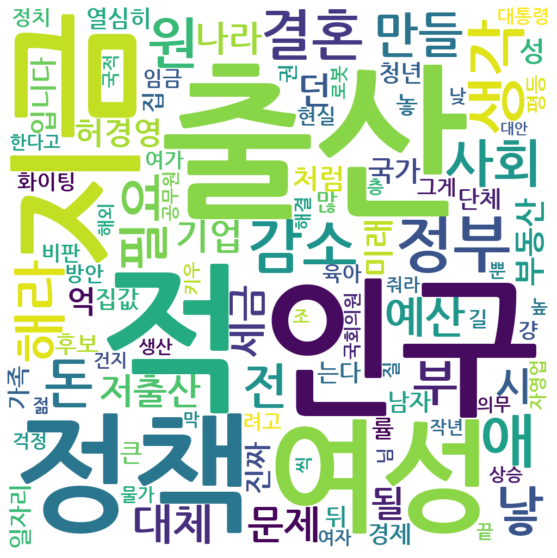

In [ ]:
wordcloud = WordCloud()

font = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'

wc = WordCloud(font_path=font,\
		background_color="white", \
		width=1000, \
		height=1000, \
		max_words=100, \
		max_font_size=300
    )
wc = wc.generate_from_frequencies(word_total)

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

#plt.show()

plt.savefig(f'/content/{query}.png')


In [ ]:
total_data.to_csv(f'/content/{query}.csv',encoding='utf-8')

In [ ]:
import pandas as pd
policy1 = pd.read_csv('/content/영아수당 지급.csv')
policy2 = pd.read_csv('/content/부부육아 휴직 활성화.csv')
policy3 = pd.read_csv('/content/다자녀 지원 확대.csv')
policy4 = pd.read_csv('/content/공보육 확충.csv')

In [ ]:
policy1['policy'] = '영아수당 지급'
policy2['policy'] = '부부육아 휴직 활성화'
policy3['policy'] = '다자녀 지원 확대'
policy4['policy'] = '공보육 확충'

In [ ]:
policy = pd.concat([policy1,policy2])
policy

,Unnamed: 0,reply,tokenized,policy
0,0,무슨 중복이요 그럼 휴직급여 그거 하나 받고 키우라는건디 다 일 그만두라는거에요 ...,"['중복', '요', '휴직급', '그거', '키우', '건디', '그만두', '에...",영아수당 지급
1,1,와 년 주는거도 건드리네 더줄생각은 못하고,"['건드리', '생각']",영아수당 지급
2,2,무슨 중복인지 그럼 다 경력단절되어야하는건가,"['중복', '인지', '경력', '단절', '어야', '건가']",영아수당 지급
3,3,세금 내고 일하는 워킹맘이 죄인인가 부모급여 줄 것처럼 언플해서 원래 지자체에서 자...,"['세금', '워킹', '맘', '죄인', '인가', '부모', '급여', '처럼'...",영아수당 지급
4,4,기사놈 사회성 없는거같음,"['기사', '사회', '성']",영아수당 지급
...,...,...,...,...
1927,2414,어 자기야 자기가 멍충이라서 이해 못해,"['멍', '충이', '라서', '이해']",부부육아 휴직 활성화
1928,2415,페미 이재명 대통령되면 대한민국은 진짜 페미때문에 더 망한다,"['페미', '이재명', '대통령', '대한민국', '진짜', '페미', '망한다']",부부육아 휴직 활성화
1929,2416,리죄명은 치마두른 여자를 조아하는디일반여성은 리죄명을 시러하지,"['리', '죄명', '치마', '두른', '여자', '조아', '는디', '일반'...",부부육아 휴직 활성화
1930,2417,국가를 성남시처럼운영하려고하나,"['국가', '성남시', '처럼', '운영', '려고']",부부육아 휴직 활성화


In [ ]:
policy = pd.concat([policy,policy4])
policy

,Unnamed: 0,reply,tokenized,policy
0,0,무슨 중복이요 그럼 휴직급여 그거 하나 받고 키우라는건디 다 일 그만두라는거에요 ...,"['중복', '요', '휴직급', '그거', '키우', '건디', '그만두', '에...",영아수당 지급
1,1,와 년 주는거도 건드리네 더줄생각은 못하고,"['건드리', '생각']",영아수당 지급
2,2,무슨 중복인지 그럼 다 경력단절되어야하는건가,"['중복', '인지', '경력', '단절', '어야', '건가']",영아수당 지급
3,3,세금 내고 일하는 워킹맘이 죄인인가 부모급여 줄 것처럼 언플해서 원래 지자체에서 자...,"['세금', '워킹', '맘', '죄인', '인가', '부모', '급여', '처럼'...",영아수당 지급
4,4,기사놈 사회성 없는거같음,"['기사', '사회', '성']",영아수당 지급
...,...,...,...,...
70,93,정년 늘리는 수 밖에 없지 지금 태어난 애들이 성인되는 나이 즈음 되면 정년 늘려도...,"['정년', '늘리', '밖', '지금', '태어난', '애', '성인', '나이'...",공보육 확충
71,94,인구감소가 경제엔 불이익일수 있으나 환경문제 사회문제엔 순작용이다 인구감소 저출산 ...,"['인구', '감소', '경제', '엔', '불이익', '으나', '환경', '문제...",공보육 확충
72,95,허경영 뽑아ㅎ,"['허경영', 'ㅎ']",공보육 확충
73,96,자기들끼리 자화자찬하는군,"['끼리', '자화자찬', '는군']",공보육 확충


In [ ]:
policy.to_csv('/content/저출산 정책 기사_댓글 모음.csv')